In [37]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [38]:
data = pd.read_csv('D:\Tadeg papiers\Data/credit_scoring.csv', sep=',')

In [39]:
data

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,2,1,1,60,39,2,1,1,69,92,0,0,900,1020
4451,1,22,2,60,46,2,1,1,60,75,3000,600,950,1263
4452,2,0,2,24,37,2,1,2,60,90,3500,0,500,963
4453,1,0,1,48,23,1,1,3,49,140,0,0,550,550


# Apprentissage supervisé : Feature engineering et Classification

## Question 1

In [14]:
datav=data.values # on veut prédire si la personne sera apte à rembourser un crédit ou non (ici, status)
X=datav[:,1:14]
Y=datav[:,0]

In [24]:
Y[Y==2]=0 # Cela pouvait porter à confusion: les personnes ayant rembourser un crédit avait un statut 1, et ceux n'y ayant pas 
          # accès un statut de 2

In [40]:
Y.shape
np.histogram(Y,bins=2)

(array([1255, 3200], dtype=int64), array([0. , 0.5, 1. ]))

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25) # pas utile de préciser: c'est 25% par défaut
                                                                          # on coupe la base en 75% d'apprentissage et 25 de test

In [43]:
X_test.shape

(1114, 13)

## Question 2

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
clf = DecisionTreeClassifier()
clf.fit(X_train,Y_train)         # On entraîne sur la base d'apprentissage

DecisionTreeClassifier()

In [50]:
Y_pred=clf.predict(X_test) # on prédit Ychap à partir de la base X_test. On comparera avec Y_test

In [51]:
sum(Y_test==Y_pred)/Y_test.size # probabilité d'avoir eu la bonne prédiction de Y_test à partir de X_test (et de notre classif)

0.7315978456014363

In [59]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [60]:
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.53      0.50      0.51       314
           1       0.81      0.82      0.81       800

    accuracy                           0.73      1114
   macro avg       0.67      0.66      0.66      1114
weighted avg       0.73      0.73      0.73      1114

[[157 157]
 [142 658]]


In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
neigh= KNeighborsClassifier(5)
neigh.fit(X_train,Y_train)

KNeighborsClassifier()

In [56]:
Y_pred2=neigh.predict(X_test)

In [57]:
sum(Y_test==Y_pred2)/Y_test.size

0.7262118491921006

In [58]:
print(classification_report(Y_test, Y_pred2))
print(confusion_matrix(Y_test, Y_pred2))

              precision    recall  f1-score   support

           0       0.52      0.32      0.40       314
           1       0.77      0.89      0.82       800

    accuracy                           0.73      1114
   macro avg       0.65      0.60      0.61      1114
weighted avg       0.70      0.73      0.70      1114

[[101 213]
 [ 92 708]]


La précision mesure le pourcentage de personnes identifiés qui s'apprêtent à rembourser un crédit et qui ont été classées correctement. C'est donc le critère de sélection dont nous nous servons ici.
D'après ce critère, le meilleur classificateur est l'arbre de décision.

## Question 3

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
st=StandardScaler().fit(X)

In [65]:
X_scaled=st.transform(X)

In [66]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_scaled, Y, test_size=0.25) 
                                                                                     

In [67]:
clf2 = DecisionTreeClassifier()
clf2.fit(X_train2,Y_train2) 

DecisionTreeClassifier()

In [68]:
Y_pred3=clf2.predict(X_test2)

In [69]:
print(sum(Y_test2==Y_pred3)/Y_test2.size) 
print(classification_report(Y_test2, Y_pred3))
print(confusion_matrix(Y_test2, Y_pred3))

0.725314183123878
              precision    recall  f1-score   support

           0       0.51      0.53      0.52       311
           1       0.82      0.80      0.81       803

    accuracy                           0.73      1114
   macro avg       0.66      0.67      0.66      1114
weighted avg       0.73      0.73      0.73      1114

[[166 145]
 [161 642]]


In [70]:
neigh2= KNeighborsClassifier(5)
neigh2.fit(X_train2,Y_train2)

KNeighborsClassifier()

In [71]:
Y_pred4=neigh.predict(X_test2)

In [72]:
sum(Y_test2==Y_pred4)/Y_test2.size
print(sum(Y_test2==Y_pred4)/Y_test2.size)
print(classification_report(Y_test2, Y_pred4))
print(confusion_matrix(Y_test2, Y_pred4))

0.7208258527827648
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       311
           1       0.72      1.00      0.84       803

    accuracy                           0.72      1114
   macro avg       0.36      0.50      0.42      1114
weighted avg       0.52      0.72      0.60      1114

[[  0 311]
 [  0 803]]


Les valeurs de précision et de recall sont globalament meilleures pour le cas de l'arbre de décision. Néanmoins, tout est prédit comme étant positif dans le cas des plus proches voisins (la standardisation des données n'est pas forcément bonne pour tous les algorithmes).

## Question 4

In [73]:
from sklearn.decomposition import PCA

In [74]:
acp=PCA(0.9)      
acp.fit(X_scaled) 
X_PCA=acp.transform(X_scaled) 

In [75]:
X_conc=np.concatenate((X_scaled,X_PCA),axis=1)
X_conc.shape

(4455, 23)

In [76]:
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X_conc, Y, test_size=0.25)

In [77]:
clf3 = DecisionTreeClassifier()
clf3.fit(X_train3,Y_train3) 
Y_pred5=clf3.predict(X_test3)
print(sum(Y_test3==Y_pred5)/Y_test3.size) 
print(classification_report(Y_test3, Y_pred5))
print(confusion_matrix(Y_test3, Y_pred5))

0.725314183123878
              precision    recall  f1-score   support

           0       0.53      0.48      0.51       324
           1       0.80      0.82      0.81       790

    accuracy                           0.73      1114
   macro avg       0.66      0.65      0.66      1114
weighted avg       0.72      0.73      0.72      1114

[[157 167]
 [139 651]]


In [78]:
neigh3= KNeighborsClassifier(5)
neigh3.fit(X_train3,Y_train3)
Y_pred6=neigh3.predict(X_test3)
print(sum(Y_test3==Y_pred6)/Y_test3.size)
print(classification_report(Y_test3, Y_pred6))
print(confusion_matrix(Y_test3, Y_pred6))

0.7360861759425493
              precision    recall  f1-score   support

           0       0.57      0.39      0.46       324
           1       0.78      0.88      0.83       790

    accuracy                           0.74      1114
   macro avg       0.67      0.63      0.64      1114
weighted avg       0.72      0.74      0.72      1114

[[127 197]
 [ 97 693]]


On voit que les classifieurs donnent de meilleures prédictions qu'avant l'utilisation des PCA. De plus, les classifieurs prévoient mieux les 0 qu'avant les PCA.

## Question 5

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [80]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train2, Y_train2)
importances=clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)

In [81]:
sorted_idx = np.argsort(importances)[::-1]
sorted_idx

array([ 8, 11, 12,  0,  3,  9,  5,  7,  6,  2,  1, 10,  4], dtype=int64)

In [82]:
features=data.columns.values
print(features[sorted_idx])

['Expenses' 'Debt' 'Amount' 'Status' 'Time' 'Income' 'Marital' 'Job'
 'Records' 'Home' 'Seniority' 'Assets' 'Age']


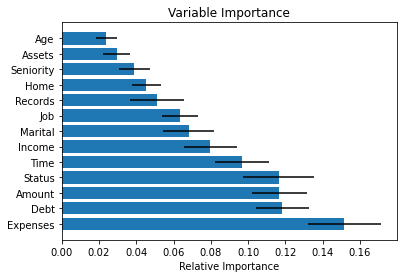

In [83]:
padding = np.arange(X_train2.size/len(X_train2)) + 0.5
plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

In [84]:
KNN=KNeighborsClassifier(n_neighbors=5)
scores=np.zeros(X_train2.shape[1]+1)
for f in np.arange(0, X_train2.shape[1]+1):
 X1_f = X_train2[:,sorted_idx[:f+1]]
 X2_f = X_test2[:,sorted_idx[:f+1]]
 KNN.fit(X1_f,Y_train2)
 YKNN=KNN.predict(X2_f)
 scores[f]=np.round(accuracy_score(Y_test2,YKNN),3)

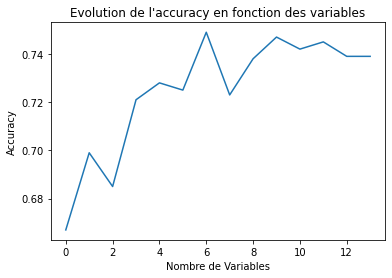

In [85]:
plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables")
plt.show()

J'avais énoncé précédemment que le critère de sélection que nous utilisons ici est la précision (accuracy). Sur ce graphique, on peut voir qu'elle est maximale quand on garde 6 variables: c'est donc la valeur optimale pour prédire si une personne va payer son crédit.

## Question 6

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
tuned_parameters = [{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

GridSearchCV(KNN, tuned_parameters, cv=5)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

## Question 7

In [88]:
from sklearn.pipeline import Pipeline

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [90]:
pip=Pipeline([('Normalisation', StandardScaler()),('ACP', PCA(0.9)), ('clf', DecisionTreeClassifier())])

In [94]:
pip.fit(X_train,Y_train)
pip.predict(X_test)

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

## Question 8

In [95]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
import time
from sklearn.metrics import auc

In [96]:
clfs = {
'RF': RandomForestClassifier(n_estimators=50),
'KNN': KNeighborsClassifier(n_neighbors=10),
'NBS': GaussianNB(),
'TreeCART':DecisionTreeClassifier(),
'TreeID3': DecisionTreeClassifier(criterion="entropy"),
'MultilayerPerceptron': MLPClassifier(hidden_layer_sizes=(2, 20)),
'Bagging': BaggingClassifier(n_estimators=50),
'ADABoost':AdaBoostClassifier(n_estimators=50)
}

In [97]:
def run_classifiers(clfs,X,Y):
    kf = KFold(n_splits=10, shuffle=True, random_state=0)
    for i in clfs:
        a=time.time()
        clf = clfs[i]
        cv_acc = cross_val_score(clf, X, Y, cv=kf)
        cv_auc = cross_val_score(clf, X, Y, cv=kf, scoring='roc_auc')
        print("Accuracy for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_acc), np.std(cv_acc)))
        print("AUC for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_auc), np.std(cv_auc)))
        print(time.time()-a)

In [98]:
run_classifiers(clfs,X,Y)

Accuracy for RF is: 0.784 +/- 0.021
AUC for RF is: 0.824 +/- 0.019
3.9972808361053467
Accuracy for KNN is: 0.724 +/- 0.028
AUC for KNN is: 0.680 +/- 0.040
0.496692419052124
Accuracy for NBS is: 0.716 +/- 0.026
AUC for NBS is: 0.625 +/- 0.032
0.043883562088012695
Accuracy for TreeCART is: 0.723 +/- 0.020
AUC for TreeCART is: 0.663 +/- 0.030
0.3390922546386719
Accuracy for TreeID3 is: 0.707 +/- 0.018
AUC for TreeID3 is: 0.636 +/- 0.025
0.40692853927612305
Accuracy for MultilayerPerceptron is: 0.720 +/- 0.021
AUC for MultilayerPerceptron is: 0.583 +/- 0.068
8.110291481018066
Accuracy for Bagging is: 0.782 +/- 0.015
AUC for Bagging is: 0.819 +/- 0.018
10.887081384658813
Accuracy for ADABoost is: 0.794 +/- 0.021
AUC for ADABoost is: 0.832 +/- 0.021
2.896244525909424


On voit qu'avec l'algorithme ADABoost, la précision est la plus importante en moyenne et l'écart-type reste assez faible: c'est la méthode qu'on utilise dans notre cas (les données ne sont pas très importantes en taille, le fait que l'algorithme prenne du temps est acceptable).
Dans un cas où le temps d'exécution aurait été une contrainte importante, on aurait pu opter pour le Naive Bayes Simple qui est l'algorithme qui s'exécute le plus vite, tout en gardant une précision importante (en moyenne il est 4eme, ben qu'il ait un écart type plus élevé que la majorité des autres algorithmes).